In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
path = './boardgamegeek-reviews/'
games = pd.read_csv(path + '2019-05-02.csv')

In [8]:
games.describe()

,ID,Year,Rank,Average,Bayes average,Users rated
count,17065.000000,17065.000000,17065.000000,17065.000000,17065.000000,17065.000000
mean,86456.272781,1985.452212,8533.000000,6.352151,5.697914,772.069792
std,84274.493113,190.152024,4926.385507,0.914175,0.379697,3057.512484
min,1.000000,0.000000,1.000000,1.050000,3.471000,30.000000
25%,8374.000000,1999.000000,4267.000000,5.780000,5.511000,55.000000
50%,41898.000000,2009.000000,8533.000000,6.380000,5.556000,118.000000
75%,163154.000000,2015.000000,12799.000000,6.960000,5.702000,369.000000
max,272409.000000,3500.000000,17065.000000,9.600000,8.611000,84736.000000


In [10]:
games = games.sort_values('Users rated', ascending=False)
games = games.rename(index=str, columns={"Bayes average": "Geekscore",'Name':'name'})
games.head(10)

,ID,name,Year,Rank,Average,Geekscore,Users rated,URL,Thumbnail
320,13,Catan,1995,321,7.19,7.038,84736,/boardgame/13/catan,https://cf.geekdo-images.com/micro/img/e0y6Bog...
149,822,Carcassonne,2000,150,7.43,7.322,84425,/boardgame/822/carcassonne,https://cf.geekdo-images.com/micro/img/z0tTaij...
74,30549,Pandemic,2008,75,7.64,7.546,82770,/boardgame/30549/pandemic,https://cf.geekdo-images.com/micro/img/0m3-oqB...
44,68448,7 Wonders,2010,45,7.78,7.690,68569,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/micro/img/h-Ejv31...
75,36218,Dominion,2008,76,7.65,7.546,67921,/boardgame/36218/dominion,https://cf.geekdo-images.com/micro/img/VYp2s2f...
139,9209,Ticket to Ride,2004,140,7.45,7.345,60151,/boardgame/9209/ticket-ride,https://cf.geekdo-images.com/micro/img/2ytp3TG...
24,31260,Agricola,2007,25,7.99,7.887,56793,/boardgame/31260/agricola,https://cf.geekdo-images.com/micro/img/Snnyt1c...
20,3076,Puerto Rico,2002,21,8.04,7.921,56238,/boardgame/3076/puerto-rico,https://cf.geekdo-images.com/micro/img/ti5gCF_...
205,40692,Small World,2009,206,7.30,7.215,53321,/boardgame/40692/small-world,https://cf.geekdo-images.com/micro/img/TTJkpvN...
58,178900,Codenames,2015,59,7.72,7.625,50564,/boardgame/178900/codenames,https://cf.geekdo-images.com/micro/img/3Ihe0IB...


In [12]:
reviews = pd.read_csv(path + 'bgg-13m-reviews.csv', index_col=0)
print(len(reviews))
reviews.head()

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


13170073


,user,rating,comment,ID,name
0,sidehacker,10.0,NaN,13,Catan
1,Varthlokkur,10.0,NaN,13,Catan
2,dougthonus,10.0,"Currently, this sits on my list as my favorite...",13,Catan
3,cypar7,10.0,"I know it says how many plays, but many, many ...",13,Catan
4,ssmooth,10.0,NaN,13,Catan


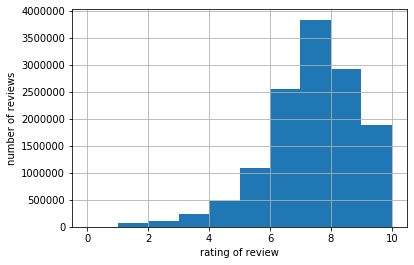

In [14]:
plt.hist(reviews.rating, bins=10)
plt.xlabel('rating of review')
plt.ylabel('number of reviews')
plt.grid(True); plt.show()

In [20]:
detail_data = pd.read_csv(path + 'games_detailed_info.csv', low_memory=False, index_col=0)

In [30]:
use_col_ind = np.where(detail_data.isnull().sum() / len(detail_data)  < .5)[0]
detailed = detail_data[detail_data.columns[use_col_ind]]
print(len(detailed))
detailed.head()

17063


,Board Game Rank,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamedesigner,boardgamefamily,boardgamemechanic,boardgamepublisher,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,327,7.19118,2.3399,7.03556,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...",['Negotiation'],['Klaus Teuber'],"['Catan', 'Promotional Board Games']","['Dice Rolling', 'Modular Board', 'Route/Netwo...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,151,7.42605,1.9247,7.32084,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Carcassonne', 'Country: France']","['Area Control / Area Influence', 'Tile Placem...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,74,7.63799,2.4220,7.54432,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...",['Medical'],['Matt Leacock'],['Pandemic'],"['Action Point Allowance System', 'Cooperative...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,45,7.78118,2.3397,7.68858,"['Antoine Bauza', 'Miguel Coimbra']","['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['7 Wonders', 'Tableau Building']","['Card Drafting', 'Hand Management', 'Set Coll...","['Repos Production', 'ADC Blackfire Entertainm...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,76,7.64470,2.3623,7.54296,"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008


In [31]:
detailed.columns

Index(['Board Game Rank', 'average', 'averageweight', 'bayesaverage',
       'boardgameartist', 'boardgamecategory', 'boardgamedesigner',
       'boardgamefamily', 'boardgamemechanic', 'boardgamepublisher',
       'description', 'id', 'image', 'maxplayers', 'maxplaytime', 'median',
       'minage', 'minplayers', 'minplaytime', 'numcomments', 'numweights',
       'owned', 'playingtime', 'primary', 'stddev',
       'suggested_language_dependence', 'suggested_num_players',
       'suggested_playerage', 'thumbnail', 'trading', 'type', 'usersrated',
       'wanting', 'wishing', 'yearpublished'],
      dtype='object')

```
'boardgameartist' : Information about creators
'boardgamecategory' : BGG category
'boardgamedesigner' : Information about creators
'boardgamefamily' : Don't know this one, maybe something with expansions
'boardgamemechanic' : Details the mechanics the game uses, such as bluffing
'boardgamepublisher' : Information about creators
'description' : Text description of the game
'id' : IMPORTANT the is the unique key
'image' : Link to BGG page
'maxplayers' : Maximum amount of players the game is playable with
'maxplaytime' : Maximal game time
'median' : The median score of the game
'minage' : The minimal age to play the game
'minplayers' : Minimal amount of players the game is playable with
'minplaytime' : Minimal game time
'numcomments' : AMount of users that have commented on their score
'numweights' : Amount of users that have rated the complexity of the game
'owned' : The amount of users that own the game
'playingtime' : How long the game takesin minutes
'primary' : IMPORTANT this is the primary name of the game
'stddev' : Standard deviation of the game reviews
'suggested_language_dependence' : The suggestions that users have given for easy  the game is to play in different languages
'suggested_num_players' : The suggestions that users have given for the optimal number of players
'suggested_playerage' : The suggestions that users have given for how old someone needs to be to play
'thumbnail' : The link to the BGG game page
'trading' : The amount of users that trade this game
'type' : Alwayss a boardgame
'usersrated' : The amount of reviews. No comment necessary to be counted
'wanting' : The amount of users that have this game on their wantlist
'wishing' : The amount of users that have this game on their wishlist
'yearpublished' : The year the game was published
```

In [131]:
detailed.isnull().sum() / len(detailed)

Board Game Rank                  0.000000
average                          0.000000
averageweight                    0.000000
bayesaverage                     0.000000
boardgameartist                  0.287933
boardgamecategory                0.010784
boardgamedesigner                0.019809
boardgamefamily                  0.266893
boardgamemechanic                0.091660
boardgamepublisher               0.000000
description                      0.000059
id                               0.000000
image                            0.002344
maxplayers                       0.000000
maxplaytime                      0.000000
median                           0.000000
minage                           0.000000
minplayers                       0.000000
minplaytime                      0.000000
numcomments                      0.000000
numweights                       0.000000
owned                            0.000000
playingtime                      0.000000
primary                          0

In [35]:
detailed.T

,0,1,2,3,4,5,6,7,8,9,...,17053,17054,17055,17056,17057,17058,17059,17060,17061,17062
Board Game Rank,327,151,74,45,76,142,25,20,208,60,...,11027,12970,12966,Not Ranked,Not Ranked,12961,15499,14315,14317,15543
average,7.19118,7.42605,7.63799,7.78118,7.6447,7.44716,7.98857,8.0359,7.29949,7.71148,...,6.81297,5.93333,5.88333,6.0869,6.68103,5.93667,4.74,5.4,5.8,4.56667
averageweight,2.3399,1.9247,2.422,2.3397,2.3623,1.8629,3.6356,3.2887,2.3641,1.3099,...,1,1,3,1,2.4,1,2.375,2.5,2.75,1.6667
bayesaverage,7.03556,7.32084,7.54432,7.68858,7.54296,7.34375,7.88432,7.91934,7.21262,7.62173,...,5.52803,5.51044,5.51045,0,0,5.51052,5.47984,5.49719,5.49718,5.4791
boardgameartist,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Antoine Bauza', 'Miguel Coimbra']","['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Cyrille Daujean', 'Julien Delval']",['Klemens Franz'],"['Harald Lieske', 'Franz Vohwinkel']","['Miguel Coimbra', 'Cyrille Daujean']","['Stéphane Gantiez', 'Tomáš Kučerovský', 'Fili...",...,['Oliver Freudenreich'],['Marek Bláha'],NaN,NaN,['Jaime Iscar Gallego'],['Gabriela Silveira'],NaN,['(Uncredited)'],NaN,NaN
boardgamecategory,['Negotiation'],"['City Building', 'Medieval', 'Territory Build...",['Medical'],"['Ancient', 'Card Game', 'City Building', 'Civ...","['Card Game', 'Medieval']",['Trains'],"['Animals', 'Economic', 'Farming']","['City Building', 'Economic', 'Farming']","['Fantasy', 'Fighting', 'Territory Building']","['Card Game', 'Deduction', 'Party Game', 'Spie...",...,"['Action / Dexterity', ""Children's Game""]","[""Children's Game""]","['Novel-based', 'Puzzle']",NaN,['Sports'],"['Animals', ""Children's Game""]","['Civilization', 'Environmental', 'Modern Warf...","['Adventure', 'Deduction']","['Napoleonic', 'Wargame']","['Puzzle', 'Word Game']"
boardgamedesigner,['Klaus Teuber'],['Klaus-Jürgen Wrede'],['Matt Leacock'],['Antoine Bauza'],['Donald X. Vaccarino'],['Alan R. Moon'],['Uwe Rosenberg'],['Andreas Seyfarth'],['Philippe Keyaerts'],['Vlaada Chvátil'],...,['Gunter Baars'],"['Helmut Ast', 'Katrin Kuhr']","['Kimberly Coombs', ""Wenda O'Reilly, Ph.D.""]",['(Uncredited)'],['Jaime Iscar Gallego'],"['Alan R. Moon', 'Aaron Weissblum']","['Frank Zuuring', 'Peter Zuuring']",['Thomas Kotulla'],['Roger Sandell'],['Terry Miller Associates']
boardgamefamily,"['Catan', 'Promotional Board Games']","['Carcassonne', 'Country: France']",['Pandemic'],"['7 Wonders', 'Tableau Building']","['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...","['Country: USA', 'Ticket to Ride']","['Agricola', 'Animals: Cattle', 'Animals: Hors...","['Alea Big Box', 'Colonial Theme', 'Country: P...",['Small World'],['Codenames'],...,['Circus'],NaN,['Harry Potter'],NaN,['Sports: Football / Soccer'],NaN,['Antarctic Theme'],NaN,"['Alternate History', 'Country: England', 'Mag...",['LEGO']
boardgamemechanic,"['Dice Rolling', 'Modular Board', 'Route/Netwo...","['Area Control / Area Influence', 'Tile Placem...","['Action Point Allowance System', 'Cooperative...","['Card Drafting', 'Hand Management', 'Set Coll...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Card Drafting', 'Hand Management', 'Route/Ne...","['Area Enclosure', 'Card Drafting', 'Hand Mana...",['Variable Phase Order'],"['Area Control / Area Influence', 'Area Moveme...","['Memory', 'Partnerships', 'Press Your Luck']",...,"['Pattern Building', 'Pattern Recognition']",NaN,"['Dice Rolling', 'Grid Movement', 'Take That']",NaN,"['Area Movement', 'Hand Management', 'Simulati...",NaN,"['Area Movement', 'Campaign / Battle Card Driv...",NaN,['Hex-and-Counter'],"['Line Drawing', 'Partnerships']"
boardgamepublisher,"['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...","['Repos Production', 'ADC Blackfire Entertainm...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...","['Days of Wonder', 'ADC Blackfir

In [55]:
detailed.boardgamepublisher[0]

"['KOSMOS', '999 Games', 'Albi', 'Astrel Games', 'Bergsala Enigma', 'Brain Games', 'Capcom Co., Ltd.', 'Catan Studio', 'Competo / Marektoy', 'danspil', 'Descartes Editeur', 'Devir', 'Dexy Co', 'Eurogames', 'Filosofia Éditions', 'Galakta', 'Giochi Uniti', 'GP Games', 'Grow Jogos e Brinquedos', 'HaKubia', 'Hanayama', 'Hobby World', 'Ideal Board Games', 'Igroljub', 'IntelliGames.BG', 'Ísöld ehf.', 'Kaissa Chess & Games', 'Korea Boardgames co., Ltd.', 'L&M Games', 'Laser plus', 'Lautapelit.fi', 'Logojogos', 'Mayfair Games', 'Ninive Games', 'Piatnik', 'Smart Ltd', 'Stupor Mundi', 'Swan Panasia Co., Ltd.', 'Tilsit', 'Top Toys', 'TRY SOFT']"

In [61]:
detailed.boardgamepublisher[127]

"['Funforge', 'Asterion Press', 'Bergsala Enigma', 'Devir', 'Galápagos Jogos', 'Gém Klub Kft.', 'hobbity.eu', 'Hobby World', 'Jolly Thinkers', 'MINDOK', 'Passport Game Studios', 'Pendragon Game Studio', 'Swan Panasia Co., Ltd.', 'Zhiyanjia']"

In [66]:
detailed['suggested_num_players'][0]

"[OrderedDict([('@numplayers', '1'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '1')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '3')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '878')])])]), OrderedDict([('@numplayers', '2'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '10')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '146')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '796')])])]), OrderedDict([('@numplayers', '3'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '428')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '715')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '73')])])]), OrderedDict([('@numplayers', '4'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '966')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '280')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '28')])])]), OrderedDict([('@numplayers', '4+'), ('result'

In [72]:
detailed[['minplayers', 'maxplayers']].iloc[0]

minplayers    3
maxplayers    4
Name: 0, dtype: int64

`'suggested_num_players'`
```
[
    OrderedDict(
        [    ('@numplayers', '1'), 
             ('result', [
                     OrderedDict([('@value', 'Best'), ('@numvotes', '1')]), 
                     OrderedDict([('@value', 'Recommended'), ('@numvotes', '3')]), 
                     OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '878')])
                        ])
         ]), 
    OrderedDict(
        [    ('@numplayers', '2'), 
             ('result', [
                     OrderedDict([('@value', 'Best'), ('@numvotes', '10')]), 
                     OrderedDict([('@value', 'Recommended'), ('@numvotes', '146')]), 
                     OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '796')])
                        ])
        ]), 
    OrderedDict(
        [    ('@numplayers', '3'), 
             ('result', [
                     OrderedDict([('@value', 'Best'), ('@numvotes', '428')]),
                     OrderedDict([('@value', 'Recommended'), ('@numvotes', '715')]), 
                     OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '73')])
                        ])
        ]), 
    OrderedDict(
        [    ('@numplayers', '4'), 
             ('result', [
                     OrderedDict([('@value', 'Best'), ('@numvotes', '966')]), 
                     OrderedDict([('@value', 'Recommended'), ('@numvotes', '280')]), 
                     OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '28')])
                         ])
              ]), 
    OrderedDict(
        [    ('@numplayers', '4+'), 
             ('result', [
                     OrderedDict([('@value', 'Best'), ('@numvotes', '42')]), 
                     OrderedDict([('@value', 'Recommended'), ('@numvotes', '134')]), 
                     OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '543')])
                         ])
              ])
]
```

In [78]:
detailed['suggested_num_players'].iloc[17043]

"OrderedDict([('@numplayers', '0+'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '0')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '0')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '0')])])])"

In [79]:
detailed[['minplayers', 'maxplayers']].iloc[17043]

minplayers    4
maxplayers    0
Name: 17043, dtype: int64

![title](https://cf.geekdo-images.com/thumb/img/ygUKysKFyneg-D_hGrZkdr45YCs=/fit-in/200x150/pic2349861.jpg)

In [90]:
detailed['primary'][17043]

'Total Mania'

In [101]:
detailed['suggested_num_players'].iloc[0]

"[OrderedDict([('@numplayers', '1'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '1')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '3')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '878')])])]), OrderedDict([('@numplayers', '2'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '10')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '146')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '796')])])]), OrderedDict([('@numplayers', '3'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '428')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '715')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '73')])])]), OrderedDict([('@numplayers', '4'), ('result', [OrderedDict([('@value', 'Best'), ('@numvotes', '966')]), OrderedDict([('@value', 'Recommended'), ('@numvotes', '280')]), OrderedDict([('@value', 'Not Recommended'), ('@numvotes', '28')])])]), OrderedDict([('@numplayers', '4+'), ('result'

In [105]:
[i[4] if i[5] != '+' else i[4:6] for i in detailed['suggested_num_players'].iloc[0].split('@numplayers')][1:]

['1', '2', '3', '4', '4+']

In [106]:
[i[4] if i[5] != '+' else i[4:6] for i in detailed['suggested_num_players'].iloc[0].split('@numvotes')][1:]

['1', '3', '8', '1', '1', '7', '4', '7', '7', '9', '2', '2', '4', '1', '5']

In [ ]:
from collections import defaultdict

sug_num_player = defaultdict(dict)

for game_name in detailed.primary.values:
    sug_num_player[game_name]

In [130]:
detailed.iloc[np.where(detailed['boardgamecategory'].dropna().map(lambda x : 'Action' in x))[0]]['primary']

246                                           Jungle Speed
260                                              Crokinole
262                                                  Jenga
283                                               PitchCar
330                                          Pirate's Cove
391                              StarCraft: The Board Game
414                                        Airlines Europe
422                   Lord of the Rings: The Confrontation
448                           Smash Up: Awesome Level 9000
484                                                   Loot
486                                    Warhammer: Invasion
489                         Xia: Legends of a Drift System
517                                                   Dune
608                                             Adrenaline
682                                      Star Wars: Armada
715                                        Warrior Knights
748                                 Century: Golem Editi

In [134]:
detailed

,Board Game Rank,average,averageweight,bayesaverage,boardgameartist,boardgamecategory,boardgamedesigner,boardgamefamily,boardgamemechanic,boardgamepublisher,...,suggested_language_dependence,suggested_num_players,suggested_playerage,thumbnail,trading,type,usersrated,wanting,wishing,yearpublished
0,327,7.19118,2.3399,7.03556,"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...",['Negotiation'],['Klaus Teuber'],"['Catan', 'Promotional Board Games']","['Dice Rolling', 'Modular Board', 'Route/Netwo...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",...,"[OrderedDict([('@level', '36'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/g8LvJsd...,1685,boardgame,85332,453,4729,1995
1,151,7.42605,1.9247,7.32084,"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['City Building', 'Medieval', 'Territory Build...",['Klaus-Jürgen Wrede'],"['Carcassonne', 'Country: France']","['Area Control / Area Influence', 'Tile Placem...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/kqE4YJS...,1477,boardgame,85052,498,5403,2000
2,74,7.63799,2.4220,7.54432,"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...",['Medical'],['Matt Leacock'],['Pandemic'],"['Action Point Allowance System', 'Cooperative...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/HEKrtpT...,1977,boardgame,83486,614,7655,2008
3,45,7.78118,2.3397,7.68858,"['Antoine Bauza', 'Miguel Coimbra']","['Ancient', 'Card Game', 'City Building', 'Civ...",['Antoine Bauza'],"['7 Wonders', 'Tableau Building']","['Card Drafting', 'Hand Management', 'Set Coll...","['Repos Production', 'ADC Blackfire Entertainm...",...,"[OrderedDict([('@level', '1'), ('@value', 'No ...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/Grz-qM9...,1162,boardgame,69132,1029,9464,2010
4,76,7.64470,2.3623,7.54296,"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Card Game', 'Medieval']",['Donald X. Vaccarino'],"['Crowdfunding: Wspieram', 'Dominion', 'Mensa ...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",...,"[OrderedDict([('@level', '21'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/iPlTR5c...,1806,boardgame,68284,571,6703,2008
5,142,7.44716,1.8629,7.34375,"['Cyrille Daujean', 'Julien Delval']",['Trains'],['Alan R. Moon'],"['Country: USA', 'Ticket to Ride']","['Card Drafting', 'Hand Management', 'Route/Ne...","['Days of Wonder', 'ADC Blackfire Entertainmen...",...,"[OrderedDict([('@level', '41'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/WRanmC5...,750,boardgame,60558,671,5350,2004
6,25,7.98857,3.6356,7.88432,['Klemens Franz'],"['Animals', 'Economic', 'Farming']",['Uwe Rosenberg'],"['Agricola', 'Animals: Cattle', 'Animals: Hors...","['Area Enclosure', 'Card Drafting', 'Hand Mana...","['Lookout Games', '999 Games', 'Brain Games', ...",...,"[OrderedDict([('@level', '31'), ('@value', 'No...","[OrderedDict([('@numplayers', '1'), ('result',...","[OrderedDict([('@value', '2'), ('@numvotes', '...",https://cf.geekdo-images.com/thumb/img/zl48oz7...,1189,boardgame,57064,1114,9167,2007
7,20,8.03590,3.2887,7.91934,"['Harald Lieske', 'Franz Vohwinkel']","['City Building', 'Economic', 'Farming']",['Andreas Seyfarth'],"['Alea Big Box', 